In [5]:
from __future__ import division
import numpy as np
import sympy as sym
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

In [6]:
## Setting the parameters of the model (calibrated values)
R, rho, gamma, eta, L, A, kapa = sym.var('R, rho, gamma, eta, L, A, kapa')

In [7]:
### Defining variables ###
k, x, y, l, r = sym.var('k, x, y, l, r')

### Defining production function ###

f = A*kapa*(eta*(k)**rho + (1- eta)*(y*(l**x/r))**rho)**(gamma/rho) - k*R

In [8]:
f.diff(k)

A*eta*gamma*k**rho*kapa*(eta*k**rho + (l**x*y/r)**rho*(-eta + 1))**(gamma/rho)/(k*(eta*k**rho + (l**x*y/r)**rho*(-eta + 1))) - R

In [9]:
(A*eta*gamma*k**rho*kapa*(eta*k**rho - (l**x*y/r)**rho*(eta - 1))**(gamma/rho) - R*k*(eta*k**rho + (l**x*y/r)**rho*(-eta + 1)))/(k*(eta*k**rho - (l**x*y/r)**rho*(eta - 1)))

(A*eta*gamma*k**rho*kapa*(eta*k**rho - (l**x*y/r)**rho*(eta - 1))**(gamma/rho) - R*k*(eta*k**rho + (l**x*y/r)**rho*(-eta + 1)))/(k*(eta*k**rho - (l**x*y/r)**rho*(eta - 1)))

## Part 1: The first order condition.
Function:
$$A\kappa(\eta(k)^{\rho} + (1 -\eta)(l^{x}y/r)^{\rho})^{\gamma/\rho} $$

Differentiating this function leads us to the first order condition:
$$A\kappa\eta\gamma k^{\rho-1}(\eta(k)^{\rho} + (1 -\eta)(l^{x}y/r)^{\rho})^{(\gamma/\rho)-1}  - R = 0 $$

## Part 2: A closer look at the polynomial for the FOC

We can rename $K = k^{1/4}$, subsitute $\rho=0.25$ and $\gamma=0.5$ and obtain a thrid degree polynomial in $K$:

$$A\kappa\eta(\eta K + (1 -\eta)(l^{x}y/r)^{\rho}) - 2 R K^{3} = 0$$
or
$$- 2 R K^{3} + A\kappa\eta^{2} K + A\kappa\eta(1 -\eta)(l^{x}y/r)^{0.25}  = 0$$

In [10]:
## Defining auxiliary functions a, c, d
a = -2*R
c = A*kapa*(eta**2)
d = A*kapa*eta*(1-eta)*((l**x)*(y/r))**(0.25)
K = sym.var('K')
pol_K = K**3*a + K*c + d
sym.solve(pol_K, K, warn=True, set=True, rational=True, manual=True)

([], set())

...which doesn't seem to work. How to solve this cubic equation?

There are several ways. But before proceeding, it is good to visualise the equation for the parameters of the model and reasonable values of the variables.

Next cell plots, for some range of values from 0 to 10, the value of the polynomial we are after. When the line crosses the vertical zero, we have a root. It is easy to see that there are, in fact, 3 real roots, two negatives and one positive.

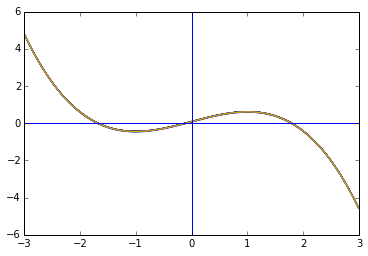

In [11]:
K_range = np.arange(-3.0,3.0,0.01)
polik = sym.lambdify((K,x,y,l,r,A,kapa,eta,R),pol_K)
for i in np.arange(0.1,2.1,0.1):
    plt.plot(K_range, polik(K_range,i,i,1/i,1,1,1,0.89,0.13099))
plt.axvline()
plt.axhline()
plt.show()

The graph above shows how for most parameter values, this polynomial has three roots, of which one is positive.

Below is a zoomed in graph for values of $x,y,l$ very close to zero. There are still three roots, only one positive.

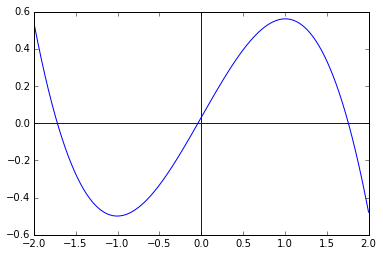

In [12]:
K_range = np.arange(-2.0,2.0,0.001)
plt.plot(K_range, polik(K_range,0.01,0.01,0.5,1,1,1,0.89,0.13099))
plt.axvline()
plt.axhline()
plt.show()

We can also vary $l$ (as we are going to normalise $r$ anyway) and see that it displaces the line to the right or to the left:

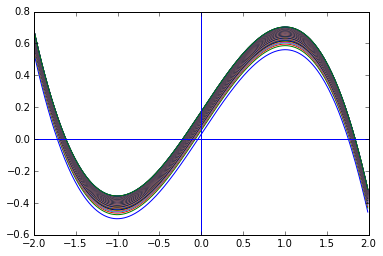

In [13]:
K_range = np.arange(-2.0,2.0,0.01)
for i in np.arange(0.01,10,0.1):
    plt.plot(K_range, polik(K_range,1,1,i,1,1,1,0.89,0.13099))
plt.axvline()
plt.axhline()
plt.show()

The extreme case is when $l=0$, in which case the second root is exactly zero. This is true for any *reasobale* combination of $x$ and $y$:

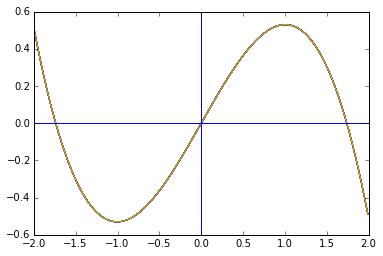

In [14]:
K_range = np.arange(-2.0,2.0,0.01)
for i in np.arange(0.01,10,0.5):
    plt.plot(K_range, polik(K_range,i,i,0,1,1,1,0.89,0.13099))
plt.axvline()
plt.axhline()
plt.show()

In the case when $l$ is also close to zero, the thried root gets closer to the zero as well. This makes sense! Zero workers, zero capital.

# Part 3: Solving for K
From wikipedia, the first step is to check for the condition below:

<img src='http://upload.wikimedia.org/math/8/0/e/80efae5ccea2ac0702e1a9c3b25afd2b.png'>

if $\Delta$ < 0 --> only one real root

if $\Delta$ > 0 --> three real roots

if $\Delta$ = 0 --> combination of both

In our case, as $b=0$, the condition is reduced to:

$$\Delta = -4ac^{3} - 27a^{2}d^{2}$$

Where $a = -2R$, $c = A\kappa\eta^{2}$, $d = A\kappa\eta(1-\eta)(l^{x}y/r)^{0.25}$

Substituting we get:

$$8RA^{3}\kappa^{3}\eta^{6} - 108 R^{2} A^{2}\kappa^{2}\eta^{2}(1-\eta)^{2}(l^{x}y/r)^{0.5}$$


In [15]:
def delta_condition(x,y,l,r,A,kappa,eta,R):
    '''
    Condition for one real root
    
    Input: A series of model parameters and values (x,y,l,r,A,kappa,eta,R)
    
    Output: the numerical value of the Delta equation followed to True if Delta>0.
    '''
    delta1 = 8*R*A**3*kappa**3*eta**6 - 108*(R**2)*(A**2)*(kappa**2)*(eta**2)*((1-eta)**2)*(((y**x)*(l/r))**(0.5))
    return delta1

# Example for (1,10,10):
print delta_condition(1.0,1.0,1,1.0,1.0,1.0,0.89,0.13099), '--> Three real roots'

0.503035715844 --> Three real roots


As the condition fails, and as we saw in teh grpah above, there are likely to be three real roots.

A way of finding them is the *Trigonometric Method*: If the condition below applies, 

In [16]:
def trig_condition(x,y,l,r,A,kappa,eta,R):
    '''
    Condition for three real roots
    
    Input: A series of model parameters and values (x,y,l,r,A,kappa,eta,R)
    
    Output: the numerical value of the trigonometric condition equation followed by the result.
    '''
    arcosine = (27/4)*(1-eta)*(y*l/r)**(1/2) - ((eta**4)*A*kappa*(x**(1/2)))/(2*R)
    if arcosine<=0:
        message = "The equation has three real roots"
    else:
        message = "The equation has at least one imaginary root"
    return arcosine, message
trig_condition(1,1,1,1,1,1,0.89,0.13099)

(-1.6524248415909615, 'The equation has three real roots')

The condition is met! Let's apply the trigonometric solution found on wikipedia for the three roots!

In [17]:
p = -(eta**2*A*kapa)/(2*R)
q = -(eta*(1-eta)*kapa*A*((l**x)*(y/r))**(1/4))/(2*R)
qmin = (eta*(1-eta)*kapa*A*(x*y*(l/r))**(1/4))/(2*R)
root_zero = 2*(-p/3)**(0.5)*sym.cos(((1/3)*sym.acos(((3*q)/(2*p))*(-3/p)**(1/2))))
root_two = -(2*(-p/3)**(0.5)*sym.cos(((1/3)*sym.acos(((3*qmin)/(2*p))*(-3/p)**(1/2)))))
root_one =  - root_zero - root_two
print "First root =", root_zero
print "Second root =", root_one
print "Thrird root =", root_two

First root = 2*6**(-0.5)*(A*eta**2*kapa/R)**0.5*cos(0.333333333333333*acos(3*6**0.5*(l**x*y/r)**0.25*(R/(A*eta**2*kapa))**0.5*(-eta + 1)/(2*eta)))
Second root = -2*6**(-0.5)*(A*eta**2*kapa/R)**0.5*cos(0.333333333333333*acos(3*6**0.5*(l**x*y/r)**0.25*(R/(A*eta**2*kapa))**0.5*(-eta + 1)/(2*eta))) + 2*6**(-0.5)*(A*eta**2*kapa/R)**0.5*cos(0.333333333333333*acos(-3*6**0.5*(R/(A*eta**2*kapa))**0.5*(l*x*y/r)**0.25*(-eta + 1)/(2*eta)))
Thrird root = -2*6**(-0.5)*(A*eta**2*kapa/R)**0.5*cos(0.333333333333333*acos(-3*6**0.5*(R/(A*eta**2*kapa))**0.5*(l*x*y/r)**0.25*(-eta + 1)/(2*eta)))


Now we neeed to know which one of this is the poisitive root. Let's evaluate it at the values given above.

In [18]:
Rt0 = sym.lambdify((x,y,l,r,A,kapa,eta,R), root_zero)
Rt1 = sym.lambdify((x,y,l,r,A,kapa,eta,R), root_one)
Rt2 = sym.lambdify((x,y,l,r,A,kapa,eta,R), root_two)
Rt0(1,1,1,1,1,1,0.89,0.13099), Rt1(1,1,1,1,1,1,0.89,0.13099), Rt2(1,1,1,1,1,1,0.89,0.13099)

(1.7976085400993507, -0.12422961405626354, -1.6733789260430871)

Let's see if we have indeed solve the polynomial:

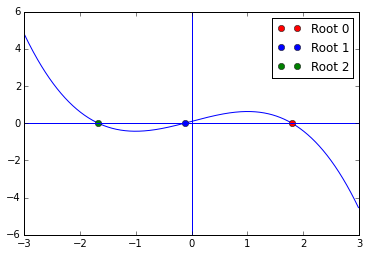

In [19]:
K_range = np.arange(-3.0,3.0,0.01)
plt.plot(K_range, polik(K_range,1,1,1,1,1,1,0.89,0.13099))
plt.plot((Rt0(1,1,1,1,1,1,0.89,0.13099)), 0, 'ro', label="Root 0")
plt.plot(Rt1(1,1,1,1,1,1,0.89,0.13099), 0, 'bo', label="Root 1")
plt.plot(Rt2(1,1,1,1,1,1,0.89,0.13099), 0, 'go', label="Root 2")
plt.legend()
plt.axvline()
plt.axhline()
plt.show()

Because $k = K^4$, all of the roots will deliver positive capital. However, below is the plot of the profits for different values of $y$ and $l$, keeping $x$ constant:

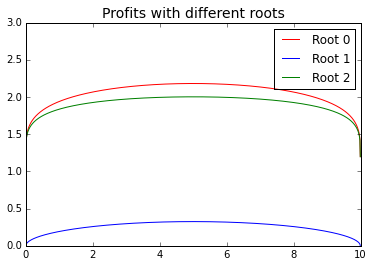

In [62]:
f_eval = sym.lambdify((k,x,y,l,r,A,kapa,eta,R,rho,gamma),f)
y_range=np.arange(0,10,0.01)
l_range=np.arange(0,17,17/1000)
l_range = l_range[::-1]
p0 = []
p1 = []
p2 = []
for i in range(1000):
    p0.append(f_eval(Rt0(1,y_range[i],l_range[i],1,1,1,0.89,0.13099)**4,1,y_range[i],l_range[i],1,1,1,0.89,0.13099,0.25,0.5))
    p1.append(f_eval(Rt1(1,y_range[i],l_range[i],1,1,1,0.89,0.13099)**4,1,y_range[i],l_range[i],1,1,1,0.89,0.13099,0.25,0.5))
    p2.append(f_eval(Rt2(1,y_range[i],l_range[i],1,1,1,0.89,0.13099)**4,1,y_range[i],l_range[i],1,1,1,0.89,0.13099,0.25,0.5))
plt.plot(y_range,p0,c='r',label='Root 0')
plt.plot(y_range,p1,c='b',label='Root 1')
plt.plot(y_range,p2,c='g',label='Root 2')
plt.ylim(0,3)
plt.title('Profits with different roots', size=14)
plt.legend()
plt.show()

Root 0 strictly dominates all of the other roots.

That means we have a winner! Below is the expression for optimal capital, *k_star*:

In [63]:
k_star = (2*6**(-0.5)*(A*eta**2*kapa/R)**0.5*sym.cos(0.333333333333333*sym.acos(3*6**0.5*(l**x*y/r)**0.25*(R/(A*eta**2*kapa))**0.5*(-eta + 1)/(2*eta))))**(4)

# Appendix: Some comparative statics

Here I adapt the function we found to become plottable:

In [53]:
def kfuc2(x,y,l,r,A,kapa,eta,R):
    return (2*6**(-0.5)*(A*eta**2*kapa/R)**0.5*np.cos(0.333333333333333*np.arccos(3*6**0.5*(l**x*y/r)**0.25*(R/(A*eta**2*kapa))**0.5*(-eta + 1)/(2*eta))))**(4)

I'm assuming positive assortive matching, that is, high types match with high types.

### Case 1: High types hire more workers

- Labour and capital would be complements:

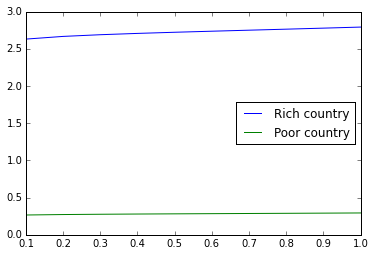

In [56]:
x_range = np.arange(0.1,1.1,0.1)
plt.plot(x_range, kfuc2(x_range,x_range,x_range/1.8,1,0.5105,1,0.89,0.13099), label="Rich country")
plt.plot(x_range, kfuc2(x_range,x_range,x_range/1.8,1,1,1,0.89,0.83684), label="Poor country")
plt.legend(loc='best')
plt.xlim(0.1,1)
plt.show()

### Case 2: High types hire less workers

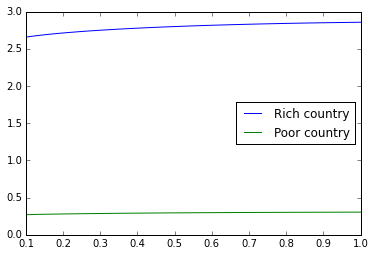

In [59]:
x_range = np.arange(0.01,1.01,0.01)
plt.plot(x_range, kfuc2(x_range,x_range,(1/x_range)**0.5,1,0.5105,1,0.89,0.13099), label="Rich country")
plt.plot(x_range, kfuc2(x_range,x_range,(1/x_range)**0.5,1,1,1,0.89,0.83684), label="Poor country")
plt.legend(loc='best')
plt.xlim(0.1,1)
plt.show()

### Local effects of changing $x,y$ and $l$

- Increasing x,y and l from (1,1,1), rich country

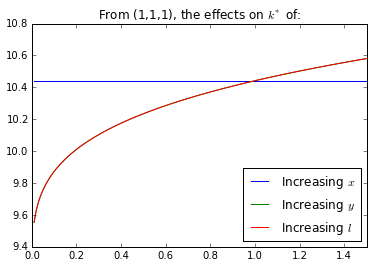

In [65]:
x_range = np.arange(0.01,1.6,0.01)
plt.plot(x_range, kfuc2(x_range,1,1,1,1,1,0.89,0.13099), label="Increasing $x$")
plt.plot(x_range, kfuc2(1,x_range,1,1,1,1,0.89,0.13099), label="Increasing $y$")
plt.plot(x_range, kfuc2(1,1,x_range,1,1,1,0.89,0.13099), label="Increasing $l$")
plt.legend(loc='best')
plt.xlim(0,1.5)
plt.title("From (1,1,1), the effects on $k^{*}$ of:")
plt.show()

- Increasing x,y and l from (1,1,1), poor country (similar change, but less magnitude)

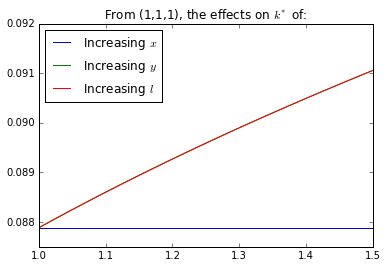

In [66]:
x_range = np.arange(1,1.6,0.01)
plt.plot(x_range, kfuc2(x_range,1,1,1,0.5105,1,0.89,0.83684), label="Increasing $x$")
plt.plot(x_range, kfuc2(1,x_range,1,1,0.5105,1,0.89,0.83684), label="Increasing $y$")
plt.plot(x_range, kfuc2(1,1,x_range,1,0.5105,1,0.89,0.83684), label="Increasing $l$")
plt.legend(loc=2)
plt.xlim(1,1.5)
plt.title("From (1,1,1), the effects on $k^{*}$ of:")
plt.show()

- Increasing y and l from 0 to 2, keeping the rest =1 ,rich country

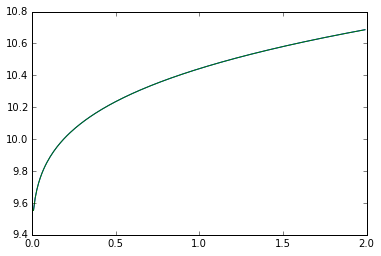

In [67]:
x_range = np.arange(0.01,2,0.01)
plt.plot(x_range, kfuc2(1,x_range,1,1,1,1,0.89,0.13099), label="$y$"+str(i))
plt.plot(x_range, kfuc2(1,1,x_range,1,1,1,0.89,0.13099), label="$l$"+str(i))
plt.show()

- Increasing y and l from 0 to 2, keeping the rest =1 ,poor country

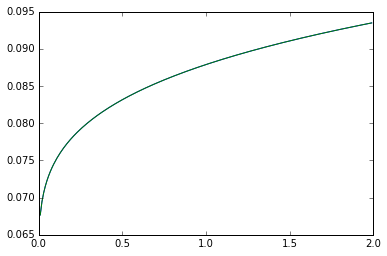

In [243]:
x_range = arange(0.01,2,0.01)
plt.plot(x_range, kfuc2(1,x_range,1,1,0.5105,1,0.89,0.83684), label="$y$"+str(i))
plt.plot(x_range, kfuc2(1,1,x_range,1,0.5105,1,0.89,0.83684), label="$l$"+str(i))
plt.show()

- Increasing $x$ from 0 to 2 and keeping the rest constant at 1 (much bigger, linear effects)

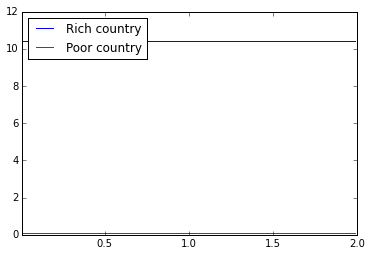

In [71]:
plt.plot(x_range, kfuc2(x_range,1,1,1,1,1,0.89,0.13099), label="Rich country")
plt.plot(x_range, kfuc2(x_range,1,1,1,0.5105,1,0.89,0.83684), label="Poor country")
plt.xlim(0.01,2)
plt.legend(loc=2)
plt.show()